## Devoir n°:1

#### set up the environment :

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm_notebook
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

#### load and clean the data :

In [15]:
data = pd.read_csv('./frais_medicaux.csv')

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [18]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [19]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [20]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### visualisation of the data:

<Figure size 1500x1000 with 0 Axes>

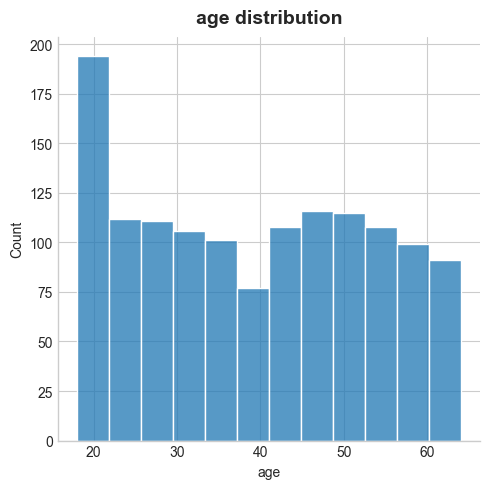

In [24]:
plt.figure(figsize=(15,10))
sns.displot(data['age']).set(title="age distribution")
plt.show()

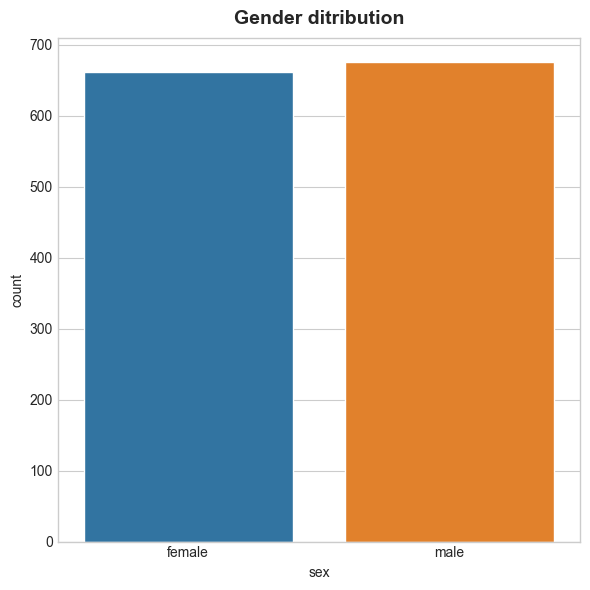

In [27]:
plt.figure(figsize=(6,6))
plt.title('Gender ditribution')
sns.countplot(x='sex',data=data)
plt.show()

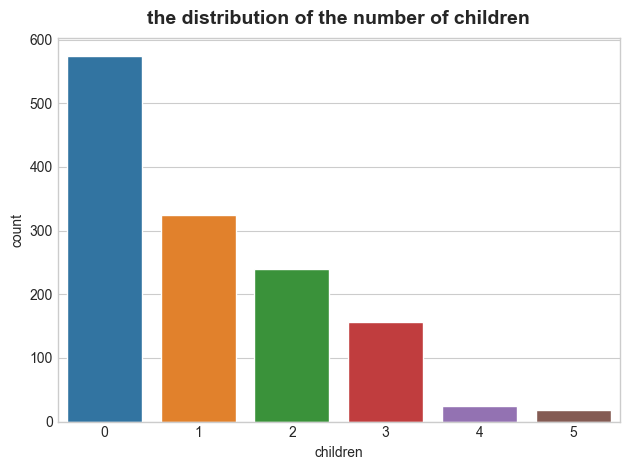

In [32]:
sns.countplot(x='children',data=data).set(title="the distribution of the number of children")
plt.show()

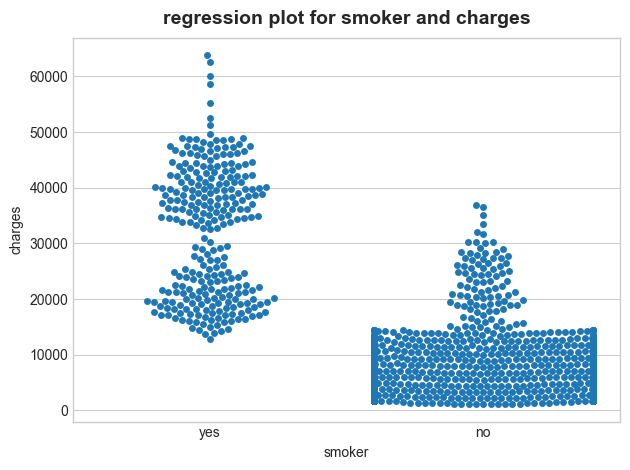

In [34]:
sns.swarmplot(x='smoker',y='charges',data=data).set(title="regression plot for smoker and charges")
plt.show()

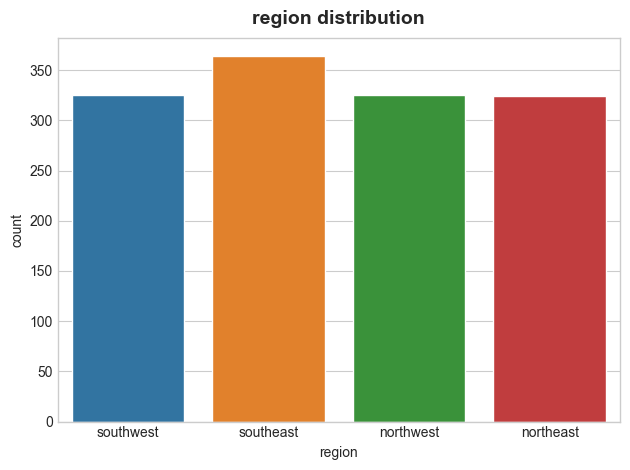

In [38]:
sns.countplot(x='region',data=data).set(title="region distribution")
plt.show()

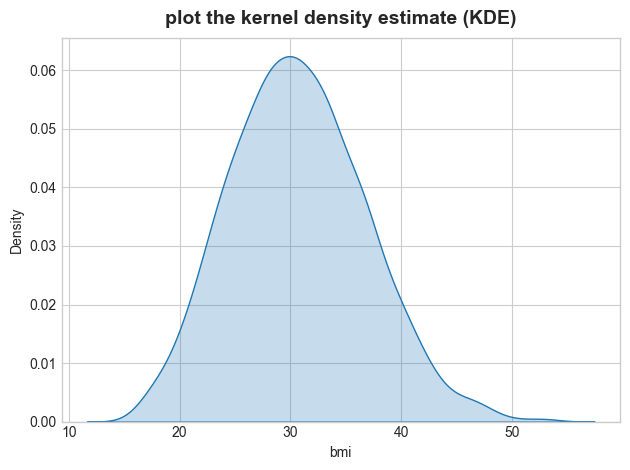

In [43]:
sns.kdeplot(data=data.bmi ,shade=True).set(title='plot the kernel density estimate (KDE)')
plt.show()

#### creation of regression model and training :

In [62]:
X = data.loc[:,data.columns != 'charges']
y = data.charges
numerical_cols = X.select_dtypes(['float','int']).columns
categorical_cols = X.select_dtypes(['object']).columns

In [63]:
categorical_transformer = ColumnTransformer(
    transformers= [
        ("categorical",OneHotEncoder(handle_unknown='ignore',sparse=False),categorical_cols)
    ]
)

#### with random forest:

  0%|          | 0/20 [00:00<?, ?it/s]

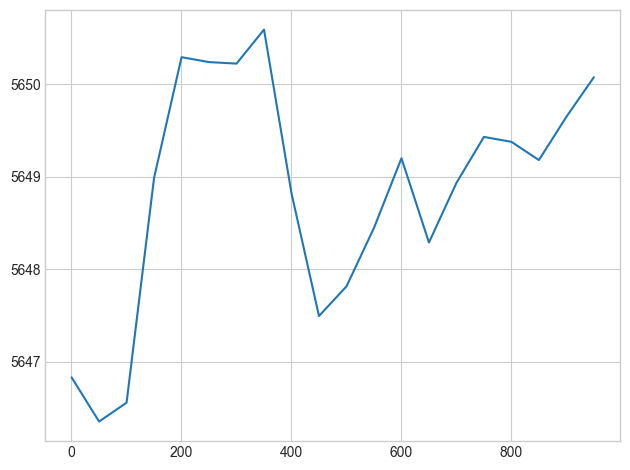

In [95]:
errors = []
for i in tqdm_notebook(range(1,1000,50)):
    model = RandomForestRegressor(n_estimators=i,random_state=0)
    pip_line_model = Pipeline(
        steps=[
            ('preprocessor', categorical_transformer),
            ('model', model)
        ]
    )
    error = -1 *cross_val_score(pip_line_model,X,y,cv=5,scoring='neg_mean_absolute_error').mean()
    errors.append(error)

x_axis = np.arange(1,1000,50)
plt.plot(x_axis,errors)
plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]

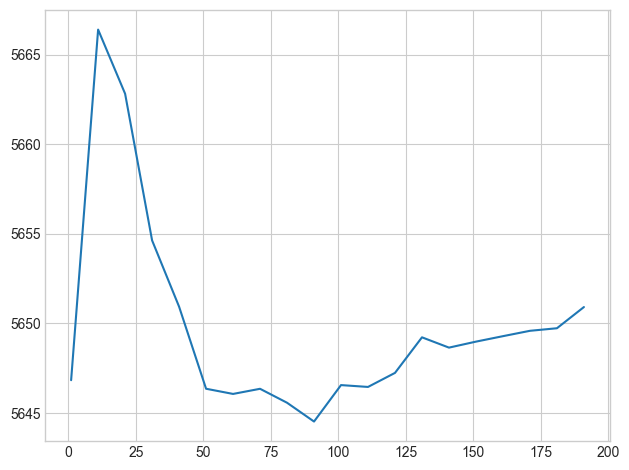

In [96]:
errors = []
for i in tqdm_notebook(range(1,200,10)):
    model = RandomForestRegressor(n_estimators=i,random_state=0)
    pip_line_model = Pipeline(
        steps=[
            ('preprocessor', categorical_transformer),
            ('model', model)
        ]
    )
    error = -1 *cross_val_score(pip_line_model,X,y,cv=5,scoring='neg_mean_absolute_error').mean()
    errors.append(error)

x_axis = np.arange(1,200,10)
plt.plot(x_axis,errors)
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

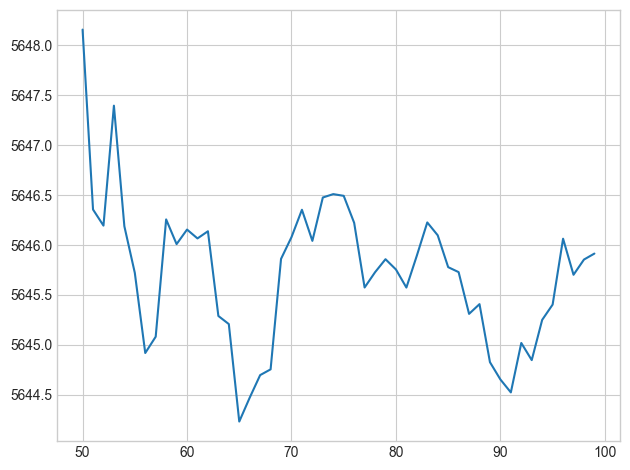

In [97]:
errors = []
for i in tqdm_notebook(range(50,100)):
    model = RandomForestRegressor(n_estimators=i,random_state=0)
    pip_line_model = Pipeline(
        steps=[
            ('preprocessor', categorical_transformer),
            ('model', model)
        ]
    )
    error = -1 *cross_val_score(pip_line_model,X,y,cv=5,scoring='neg_mean_absolute_error').mean()
    errors.append(error)

x_axis = np.arange(50,100)
plt.plot(x_axis,errors)
plt.show()

In [98]:
model = RandomForestRegressor(n_estimators=65,random_state=0)
final_model = Pipeline(
    steps=[
        ('preprocessor', categorical_transformer),
        ('model', model)
    ]
)
error = -1 *cross_val_score(pip_line_model,X,y,cv=5,scoring='neg_mean_absolute_error').mean()
print(f'final error : {error}')

final error : 5645.914675826158
